# Document Classification Test (HeavyWater Machine Learning Challenge)


**Problem Statement**

We process documents related to mortgages, aka everything that happens to originate a mortgage that you don't see as a borrower. Often times the only access to a document we have is a scan of a fax of a print out of the document. Our system is able to read and comprehend that document, turning a PDF into structured business content that our customers can act on.

This dataset represents the output of the OCR stage of our data pipeline ...  Each word in the source is mapped to one unique value in the output. If the word appears in multiple documents then that value will appear multiple times. The word order for the dataset comes directly from our OCR layer, so it should be roughly in order.

**Mission**

Train a document classification model. Deploy your model to a public cloud platform (AWS/Google/Azure/Heroku) as a webservice, send us an email with the URL to you github repo, the URL of your publicly deployed service so we can submit test cases and a recorded screen cast demo of your solution's UI, its code and deployment steps. Also, we use AWS so we are partial to you using that ... just saying.

## Setup

### Library import
We import all the required Python libraries

In [1]:
from time import asctime, gmtime, localtime, perf_counter
print(asctime(localtime()))

t0 = perf_counter()

# from platform import node
from collections import Counter, OrderedDict
import gc		# garbage collection module
import os
import pathlib
import pickle
# import pprint
from random import random
import sys

print("Python version: ", sys.version_info[:])
print("Un-versioned imports:\n")
prefixStr = ''
if 'collections' in sys.modules:
    print(prefixStr + 'collections', end="")
    prefixStr = ', '
if 'gc' in sys.modules:
    print(prefixStr + 'gc', end="")
    prefixStr = ', '
if 'os' in sys.modules:
    print(prefixStr + 'os', end="")
    prefixStr = ', '
if 'pathlib' in sys.modules:
    print(prefixStr + 'pathlib', end="")
    prefixStr = ', '
if 'pickle' in sys.modules:
    print(prefixStr + 'pickle', end="")
    prefixStr = ', '
if 'pprint' in sys.modules:
    print(prefixStr + 'pprint', end="")
    prefixStr = ', '
if 'random' in sys.modules:
    print(prefixStr + 'random', end="")
    prefixStr = ', '
if 'sys' in sys.modules:
    print(prefixStr + 'sys', end="")
    prefixStr = ', '

import re

duVersion = None
from dateutil import __version__ as duVersion
from dateutil.parser import parse
import numpy as np

mdVersion = None
# from modin import __version__ as mdVersion
# import modin.pandas as pd
import pandas as pd
ppVersion = None
# from pandas_profiling import ProfileReport
# from pandas_profiling import __version__ as ppVersion

import graphviz

gpdVersion = None
# from geopandas import __version__ as gpdVersion
# import geopandas as gpd

shpVersion = None
from shapely import __version__ as shpVersion
from shapely.geometry import Point

scVersion = None
from scipy import __version__ as scVersion
import scipy.sparse as sp

skVersion = None
from sklearn import __version__ as skVersion
# from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC  # , SVC
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.utils import class_weight

xgbVersion = None
from xgboost import __version__ as xgbVersion
from xgboost.sklearn import XGBClassifier

tfVersion = None
# from tensorflow import __version__ as tfVersion
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
# from tensorflow.keras.utils import plot_model

jlVersion = None
from joblib import __version__ as jlVersion
from joblib import dump, load

# Visualizations

mpVersion = None
from matplotlib import __version__ as mpVersion
import matplotlib.pyplot as plt

import seaborn as sns
import colorcet as cc

print("\n")
if 'colorcet' in sys.modules:
    print(f"colorcet: {cc.__version__}", end="\t")
if 'cufflinks' in sys.modules:
    print(f"cufflinks: {cf.__version__}", end="\t")
if 'dateutil' in sys.modules:
    print(f"dateutil: {duVersion}", end="\t")
if 'geopandas' in sys.modules:
    print(f"geopandas: {gpdVersion}", end="\t")
if 'graphviz' in sys.modules:
    print(f"graphviz: {duVersion}", end="\t")
if 'joblib' in sys.modules:
    print(f"joblib: {jlVersion}", end="\t")
if 'matplotlib' in sys.modules:
    print(f"matplotlib: {mpVersion}", end="\t")
if 'modin' in sys.modules:
    print(f"modin: {mdVersion}", end="\t")
if 'numpy' in sys.modules:
    print(f"numpy: {np.__version__}", end="\t")
if 'pandas' in sys.modules:
    print(f"pandas: {pd.__version__}", end="\t")
if 'pandas_profiling' in sys.modules:
    print(f"pandas_profiling: {ppVersion}", end="\t")
if 're' in sys.modules:
    print(f"re: {re.__version__}", end="\t")
if 'scipy' in sys.modules:
    print(f"scipy: {scVersion}", end="\t")
if 'seaborn' in sys.modules:
    print(f"seaborn: {sns.__version__}", end="\t")
if 'shapely' in sys.modules:
    print(f"shapely: {shpVersion}", end="\t")
if 'sklearn' in sys.modules:
    print(f"sklearn: {skVersion}", end="\t")
if 'tensorflow' in sys.modules:
    print(f"tensorflow: {tfVersion}", end="\t")
if 'xgboost' in sys.modules:
    print(f"xgboost: {xgbVersion}", end="\t")
# if '' in sys.modules:
#     print(f": {.__version__}", end="\t")
Δt = perf_counter() - t0
print(f"\n\nΔt: {Δt: 4.1f}s.")

%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30
pd.options.display.max_rows = 50

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

Sat Jan 16 17:09:32 2021
Python version:  (3, 6, 9, 'final', 0)
Un-versioned imports:

collections, gc, os, pathlib, pickle, pprint, random, sys

colorcet: 1.0.0	dateutil: 2.8.1	graphviz: 2.8.1	joblib: 0.14.1	matplotlib: 3.3.3	numpy: 1.19.4	pandas: 1.1.4	re: 2.2.1	scipy: 1.4.1	seaborn: 0.11.1	shapely: 1.7.0	sklearn: 0.22.1	xgboost: 1.3.1	

Δt:  1.2s.


### Local library import
We import all the required local libraries libraries

In [2]:
rootPath = pathlib.Path.cwd().parent
libPath = rootPath / 'python'

# Include local library paths
sys.path.append(str(libPath)) # uncomment and fill to import local libraries

# Import local libraries
from utility import ModelTrain as mt
from plotHelpers import plotHelpers as ph

**Next two lines are for pretty output for all prints in a Pandas cell, not just the last**

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Prepare Data

#### Define paths

In [4]:
dataPath = rootPath / 'data'
modelPath = rootPath / 'model'

### Import data

In [5]:
sourceData = dataPath / 'shuffled-full-set-hashed.csv.zip'
df0 = pd.read_csv(sourceData, header=None, names=['category', 'docText'])
df0.head()
df0.tail()

,category,docText
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...


,category,docText
62199,CANCELLATION NOTICE,6bf9c0cb01b4 52102c70348d 1b6d0614f2c7 246ee0c...
62200,BINDER,816aed74475e 288ccf089872 fe33912c5732 5d00ab6...
62201,BILL,f95d0bea231b 894305951372 c9a53ea6e219 8f6018d...
62202,CANCELLATION NOTICE,5ee06767bc0f 106de4332a24 46a0c35e916c 54709b2...
62203,CANCELLATION NOTICE,586242498a88 21e314d3afcc 818a7ff3bf29 4e43b72...


### Munge/inspect data

**There are 14 document categories**

In [6]:
categories = df0.category.unique()
len(categories)
print(categories)

14

['DELETION OF INTEREST' 'RETURNED CHECK' 'BILL' 'POLICY CHANGE'
 'CANCELLATION NOTICE' 'DECLARATION' 'CHANGE ENDORSEMENT'
 'NON-RENEWAL NOTICE' 'BINDER' 'REINSTATEMENT NOTICE' 'EXPIRATION NOTICE'
 'INTENT TO CANCEL NOTICE' 'APPLICATION' 'BILL BINDER']


#### Extract tokens

In [7]:
df0['tokens'] = df0.docText.apply(lambda p: [] if isinstance(p, float) else p.split())
df0.head()

,category,docText,tokens
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...,"[e04a09c87692, d6b72e591b91, 5d066f0246f1, ed4..."
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...,"[a3b334c6eefd, be95012ebf2b, 41d67080e078, ff1..."
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...,"[586242498a88, 9ccf259ca087, 54709b24b45f, 6bf..."
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...,"[cd50e861f48b, 6ca2dd348663, d38820625542, f07..."
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...,"[9db5536263d8, 1c303d15eb65, 3f89b4673455, b73..."


#### Get token counts

In [8]:
df0['docLength'] = df0.tokens.apply(lambda t: len(t))
df0.head()

,category,docText,tokens,docLength
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...,"[e04a09c87692, d6b72e591b91, 5d066f0246f1, ed4...",465
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...,"[a3b334c6eefd, be95012ebf2b, 41d67080e078, ff1...",403
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...,"[586242498a88, 9ccf259ca087, 54709b24b45f, 6bf...",185
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...,"[cd50e861f48b, 6ca2dd348663, d38820625542, f07...",337
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...,"[9db5536263d8, 1c303d15eb65, 3f89b4673455, b73...",546


**There are 45 rows with empty string, associated with 6 categories**

In [9]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62204 entries, 0 to 62203
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   62204 non-null  object
 1   docText    62159 non-null  object
 2   tokens     62204 non-null  object
 3   docLength  62204 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


**95% of documents have 784 or fewer tokens**

In [10]:
customFractions = [0.005, 0.01, 0.05, 0.15, 0.30, 0.50, 0.70, 0.85, 0.95, 0.99]
df0.describe(percentiles=customFractions).T

,count,mean,std,min,0.5%,1%,5%,15%,30%,50%,70%,85%,95%,99%,max
docLength,62204.0,334.148479,330.217525,0.0,36.0,61.0,99.0,118.0,167.0,252.0,356.0,549.0,784.0,1556.97,9076.0


**Token statistics by category**

In [11]:
df0.groupby(by='category').describe(percentiles=customFractions)

docLength                                         \
                            count        mean         std   min     0.5%   
category                                                                   
APPLICATION                 229.0  882.790393  658.559499  34.0  135.960   
BILL                      18968.0  394.706611  252.494064   0.0   70.835   
BILL BINDER                 289.0  417.166090  366.740551   5.0   22.920   
BINDER                     8973.0  480.716594  434.455427   0.0    9.000   
CANCELLATION NOTICE        9731.0  231.655842  170.913020   0.0   75.000   
CHANGE ENDORSEMENT          889.0  162.892013  212.385867  10.0   84.880   
DECLARATION                 968.0  515.944215  426.727247   0.0   33.195   
DELETION OF INTEREST       4826.0  135.487982   95.576575  66.0   76.000   
EXPIRATION NOTICE           734.0  300.241144  267.840671  70.0   78.660   
INTENT TO CANCEL NOTICE     229.0  312.934498  242.900944   8.0   98.420   
NON-RENEWAL NOTICE          624.0  234.294872  159.587147  87.0   89.115   
POLICY CHANGE             10627.0  349.221699  453.874722   0.0    8.000   
REINSTATEMENT NOTICE       4368.0  158.596612   96.379152   0.0   71.000   
RETURNED CHECK              749.0  357.631509  278.549548  42.0   60.440   

                                                                               \
                             1%      5%    15%    30%    50%     70%      85%   
category                                                                        
APPLICATION              151.92  203.40  227.8  280.4  777.0  1224.2  1523.80   
BILL                      96.00  146.35  219.0  256.0  329.0   457.0   599.00   
BILL BINDER               36.52  100.20  170.8  223.8  317.0   435.6   626.00   
BINDER                    31.72  139.00  219.0  271.0  358.0   505.0   731.20   
CANCELLATION NOTICE       77.00   99.00  117.0  146.0  179.0   257.0   339.00   
CHANGE ENDORSEMENT        95.64  106.00  108.0  109.0  111.0   115.0   219.00   
DECLARATION               56.38  105.00  213.0  284.0  403.5   587.0   816.95   
DELETION OF INTEREST      78.00   84.00   98.0  101.0  104.0   119.0   146.00   
EXPIRATION NOTICE         83.00   98.00  167.0  180.0  203.0   270.0   410.20   
INTENT TO CANCEL NOTICE  101.56  138.00  220.0  236.0  266.0   294.0   399.00   
NON-RENEWAL NOTICE        91.00   95.00  124.0  142.0  163.0   247.2   385.30   
POLICY CHANGE             24.00   71.00  111.0  168.0  228.0   361.0   527.10   
REINSTATEMENT NOTICE      77.67   99.00  111.0  123.0  134.0   157.0   187.00   
RETURNED CHECK            73.72  153.00  195.0  235.4  290.0   384.2   491.80   

                                                   
                             95%      99%     max  
category                                           
APPLICATION              2071.80  2628.72  3465.0  
BILL                      765.00  1216.33  7030.0  
BILL BINDER              1089.60  1832.24  3360.0  
BINDER                   1146.80  2397.80  7426.0  
CANCELLATION NOTICE       515.00   736.00  4107.0  
CHANGE ENDORSEMENT        357.60   716.76  4833.0  
DECLARATION              1260.30  2069.84  4734.0  
DELETION OF INTEREST      305.50   581.75  1941.0  
EXPIRATION NOTICE        1105.35  1384.74  1798.0  
INTENT TO CANCEL NOTICE   545.00  1049.92  2979.0  
NON-RENEWAL NOTICE        542.00   837.93  1071.0  
POLICY CHANGE             906.80  2125.54  9076.0  
REINSTATEMENT NOTICE      300.00   516.33  2665.0  
RETURNED CHECK            772.20  1309.04  4460.0

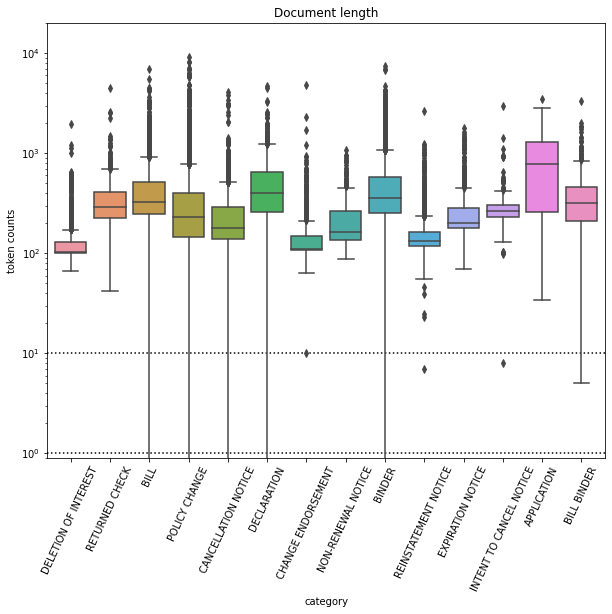

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
_ = sns.boxplot(data=df0, x='category', y='docLength', ax=ax)
ax.set_yscale('log')
_ = ax.set_ylim([0.9, 2.0e4])
# _ = ax.set_ylim([0.0, 5.0e2])
_ = ax.hlines(10, -0.6, 13.6, color='k', linestyle=':')
_ = ax.hlines(1.0, -0.6, 13.6, color='k', linestyle=':')
_ = ax.set_xlim([-0.6, 13.6])
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
_ = ax.set_title("Document length")
_ = ax.set_ylabel("token counts")

#### `df0` category breakdowns visualized

In [13]:
categoryCts = df0[['category', 'docLength']].groupby(by='category').count()\
    .rename(columns={'docLength': 'count'})
categoryCts

categoryCts.sort_values(by='count', ascending=False)
categoriesBySupport = np.array(categoryCts.sort_values(by='count', ascending=False).index)

,count
category,
APPLICATION,229
BILL,18968
BILL BINDER,289
BINDER,8973
CANCELLATION NOTICE,9731
CHANGE ENDORSEMENT,889
DECLARATION,968
DELETION OF INTEREST,4826
EXPIRATION NOTICE,734


,count
category,
BILL,18968
POLICY CHANGE,10627
CANCELLATION NOTICE,9731
BINDER,8973
DELETION OF INTEREST,4826
REINSTATEMENT NOTICE,4368
DECLARATION,968
CHANGE ENDORSEMENT,889
RETURNED CHECK,749


fileNameAugmentString:
 DocumentCategories
Δt:  0.05s.


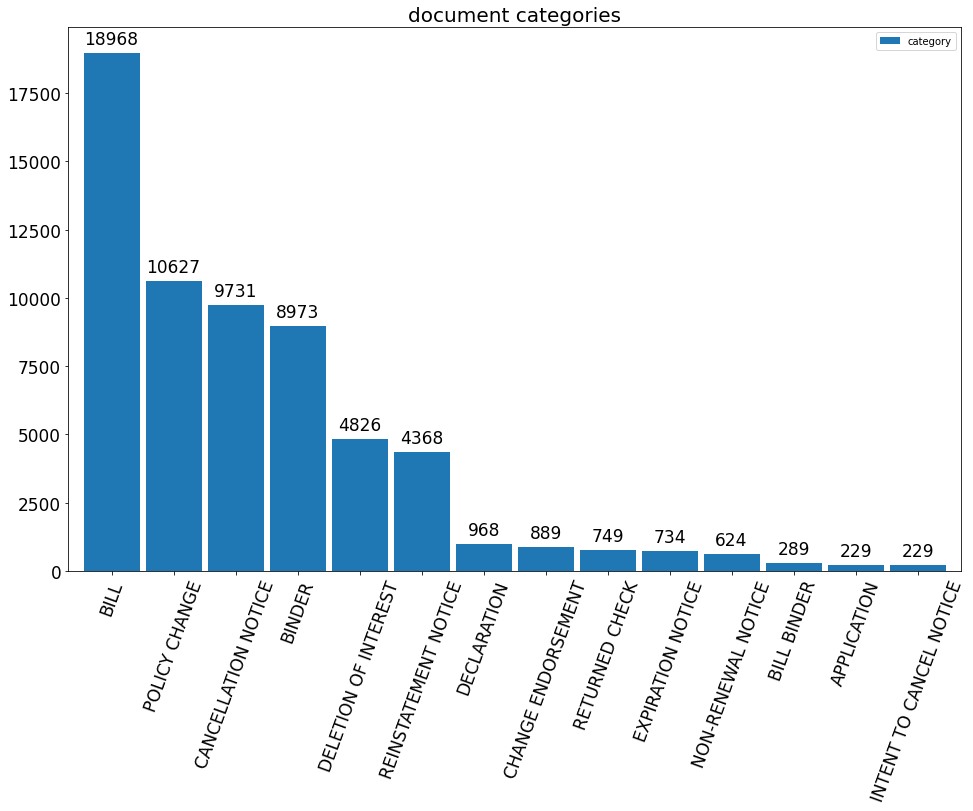

In [14]:
ph.plotValueCounts(df0, 'category', titleText='document categories',
                   annotateFontSz=17, tickFontSz=17, titleFontSz=20,
                   xrot=70.0, ctRot=0.0)  #, saveAs='svg')

#### Document length frequencies

Document lengths (mode: 100, median: 252.0, mean: 334.1, max: 9076)
Found  9076 bins in data array.
fileNameAugmentString:
 DocumentLengthsMode100Median2520Mean3341Max9076
Δt:  7.49s.


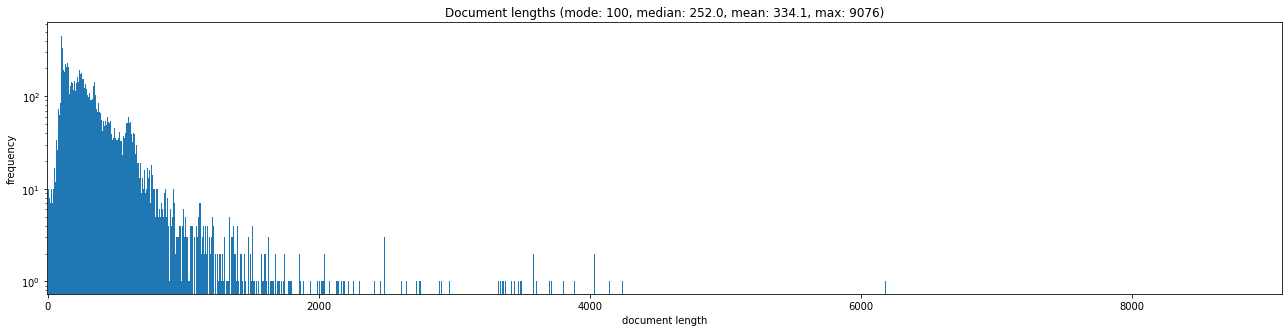

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

docLenMode = int(df0[['docLength']].mode().values)
docLenMedian = float(df0[['docLength']].median())
docLenMean = float(df0[['docLength']].mean())
docLenMax = int(df0[['docLength']].max())
myTitle = (f"Document lengths (mode: {docLenMode},"
           f" median: {docLenMedian:.1f}, "
           f"mean: {docLenMean:.1f}, "
           f"max: {docLenMax})")
print(myTitle)
ph.detailedHistogram(df0.docLength, xlabel='document length',
                     ylabel='frequency',
                     titleText=myTitle, figName='documentCountHist',
                     ax=ax, ylog=True, xlim=[-5, 9105])  # saveAs='png')

**Zoom in on 350 shortest documents**

Found  9076 bins in data array.
fileNameAugmentString:
 DocumentLengthsMode100Median2520Mean3341Max9076
Δt:  7.18s.


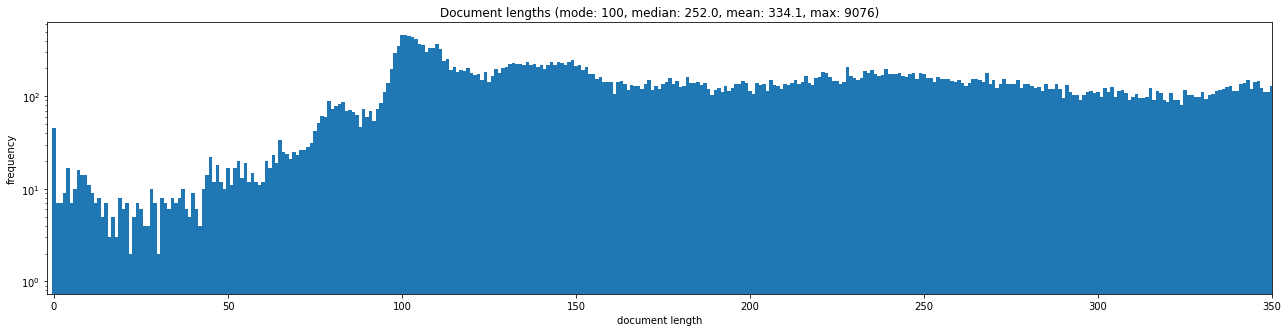

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ph.detailedHistogram(df0.docLength, xlabel='document length',
                     ylabel='frequency',
                     titleText=myTitle, figName='documentCountHist',
                     ax=ax, ylog=True, xlim=[-2, 350])  # saveAs='png')

#### Find most common tokens

In [17]:
comments = df0['tokens'].to_list()
allWords = [word for wordList in comments for word in wordList]
print(len(comments), len(allWords))

wordCtr = Counter(allWords)
wordCtr.most_common(20)
len(wordCtr)

62204 20785372


[('586242498a88', 346411),
 ('d38820625542', 306079),
 ('6ce6cc5a3203', 237302),
 ('b9699ce57810', 180756),
 ('21e314d3afcc', 176212),
 ('25c57acdf805', 157820),
 ('1015893e384a', 147030),
 ('133d46f7ed38', 130132),
 ('036087ac04f9', 127550),
 ('641356219cbc', 126011),
 ('54709b24b45f', 124257),
 ('6ca2dd348663', 118129),
 ('c337a85b8ef9', 115867),
 ('1b6d0614f2c7', 113160),
 ('6bf9c0cb01b4', 112468),
 ('0562c756a2f2', 107584),
 ('f95d0bea231b', 107535),
 ('f7ae6f8257da', 107123),
 ('6b304aabdcee', 105298),
 ('7d9e333a86da', 104240)]

1037934

#### How many very-low-frequency tokens?

In [18]:
lastCt = 1000000
tf = []
rank = []
countLtRank = []
fracLtRank = []
for i, (t, c) in enumerate(wordCtr.most_common(1037934)):
    if (c == 6) and (lastCt == 7):
        tf.append(c)
        rank.append(i)
        countLtRank.append(1037934 - i)
        fracLtRank.append((1037934 - i)/1037934.0)
    if (c == 5) and (lastCt == 6):
        tf.append(c)
        rank.append(i)
        countLtRank.append(1037934 - i)
        fracLtRank.append((1037934 - i)/1037934.0)
    if (c == 4) and (lastCt == 5):
        tf.append(c)
        rank.append(i)
        countLtRank.append(1037934 - i)
        fracLtRank.append((1037934 - i)/1037934.0)
    if (c == 3) and (lastCt == 4):
        tf.append(c)
        rank.append(i)
        countLtRank.append(1037934 - i)
        fracLtRank.append((1037934 - i)/1037934.0)
    if (c == 2) and (lastCt == 3):
        tf.append(c)
        rank.append(i)
        countLtRank.append(1037934 - i)
        fracLtRank.append((1037934 - i)/1037934.0)
    if (c == 1) and (lastCt == 2):
        tf.append(c)
        rank.append(i)
        countLtRank.append(1037934 - i)
        fracLtRank.append((1037934 - i)/1037934.0)
    lastCt = c

tfRanksDict = {'tf': tf, 'rank': rank, '# ≥ rank': countLtRank, 'frac ≥ rank': fracLtRank}
tfRanks = pd.DataFrame(tfRanksDict)
tfRanks

,tf,rank,# ≥ rank,frac ≥ rank
0,6,77189,960745,0.925632
1,5,88316,949618,0.914912
2,4,103088,934846,0.900680
3,3,128487,909447,0.876209
4,2,172658,865276,0.833652
5,1,300995,736939,0.710006


**71% of tokens occur only once, 91.5% occur 5 &times; or fewer; <em><u>most are unpredictive<u></em>**

#### How well do token occurrences follow Zipf's relation?

In [19]:
highFreqCts = np.array([t[1] for t in wordCtr.most_common(1037934)])
CtsDict = {'x': range(1037934), 'token freq': highFreqCts, 'relative freq': highFreqCts/highFreqCts.max()}
dftmp = pd.DataFrame(CtsDict)
dftmp.head()
dftmp.tail()

,x,token freq,relative freq
0,0,346411,1.000000
1,1,306079,0.883572
2,2,237302,0.685030
3,3,180756,0.521796
4,4,176212,0.508679


,x,token freq,relative freq
1037929,1037929,1,0.000003
1037930,1037930,1,0.000003
1037931,1037931,1,0.000003
1037932,1037932,1,0.000003
1037933,1037933,1,0.000003


In [20]:
len(wordCtr.keys()), len(wordCtr.values())

(1037934, 1037934)

(2.8867443585798373e-06, 1.0)

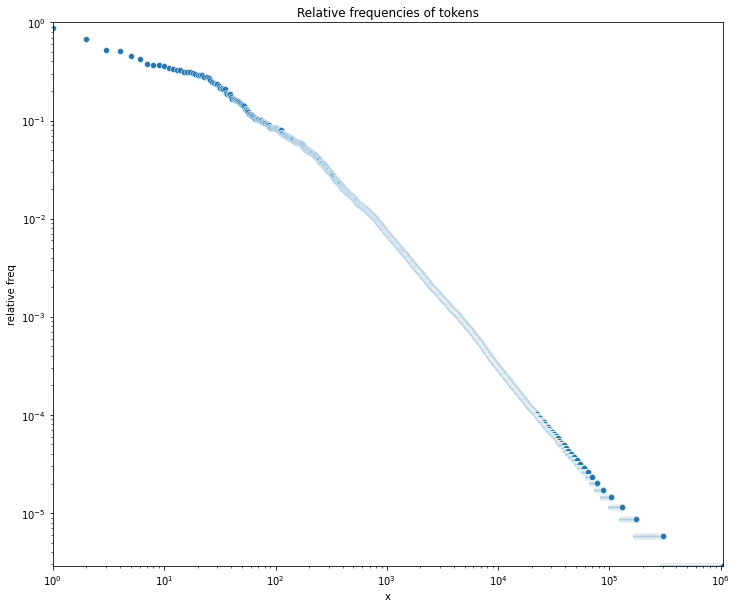

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

myTitle = 'Relative frequencies of tokens'

ax = sns.scatterplot(data=dftmp, x="x", y="relative freq")
_ = ax.set_xlim(1, 1037934)
# ax.set_ylim(max([1, dftmp['token freq'].min() - 1]), dftmp['token freq'].max() + 1)
ax.set_ylim(dftmp['relative freq'].min(), 1)
ax.set_xscale("log")
ax.set_yscale("log")
_ = ax.set_title(myTitle)

* First ~25 tokens' occurrences decline weakly compared with Zipf's relation
  * Perhaps reflects elevation of some financial terms into highest frequencies for this specialized corpus?
* After the 750th token, the falloff looks about right

### Questions

1. What do tokens represent?

  * Drop off of first hundred terms is far too modest to match Zifp's law (which would predict an order of magnitude drop by the 10th term), suggesting that this may not be ordinary English. Of course, it is not conversational English, but 'the', 'of' and 'and' still should occur at larger multiples of other terms.
  * Problem vocabulary has more than 1 million unique tokens, which [exceeds that of OED](https://en.wikipedia.org/wiki/List_of_dictionaries_by_number_of_words):
> Oxford Dictionary has 273,000 headwords; 171,476 of them being in current use, 47,156 being obsolete words and around 9,500 derivative words included as subentries. The dictionary contains 157,000 combinations and derivatives in bold type, and 169,000 phrases and combinations in bold italic type, making a total of over 600,000 word-forms. There is one count that puts the English vocabulary at about 1 million words — but that count presumably includes words such as Latin species names, prefixed and suffixed words, scientific terminology, jargon, foreign words of extremely limited English use and technical acronyms.
  * 737 k tokens have a frequency of 1, suggesting bulk of terms are noise
  * Of course, were the words already stemmed or lemmatized, we would expect to find, in documents specific to a narrow field, far *fewer* than the 171k modern head words of the OED.
  * It seems exceedingly unlikely that there is so much variation in the lexicon of mortgages and loans that the number of distinct terms is > 1 million, even after considering derivatives, inflections and combinations.
  * Most likely: lowest-frequency terms represent gibberish terms resulting from noise in scanned documents.

## Pre-process data

### test-train split

* remove documents of length < 10:
  * these are unlikely to be informative, and probably are result of scan error
  * probably should have these labeled as an error, for human review, rather than risk downstream adoption
* class imbalance spanning almost 2 orders of magnitude ⟶ *stratified sampling*
* smallest classes 229 instances, so need half to test with ~10% uncertainty
* after model selection, can train on entire data set

In [22]:
df = df0.copy()[df0.docLength > 9]
df0.shape, df.shape

((62204, 4), (62058, 4))

#### Category breakdowns for `df`

* `categoriesBySupport` is a list ordering categories by class size

In [23]:
categoryCts = df[['category', 'docLength']].groupby(by='category').count()\
    .rename(columns={'docLength': 'count'})
# categoryCts

categoryCts.sort_values(by='count', ascending=False)
categoriesBySupport = np.array(categoryCts.sort_values(by='count', ascending=False).index)

,count
category,
BILL,18944
POLICY CHANGE,10561
CANCELLATION NOTICE,9728
BINDER,8927
DELETION OF INTEREST,4826
REINSTATEMENT NOTICE,4366
DECLARATION,965
CHANGE ENDORSEMENT,889
RETURNED CHECK,749


#### `df` breakdowns visualized

* As expected statistically, losses are from larger classes

fileNameAugmentString:
 DocumentCategories
Δt:  0.09s.


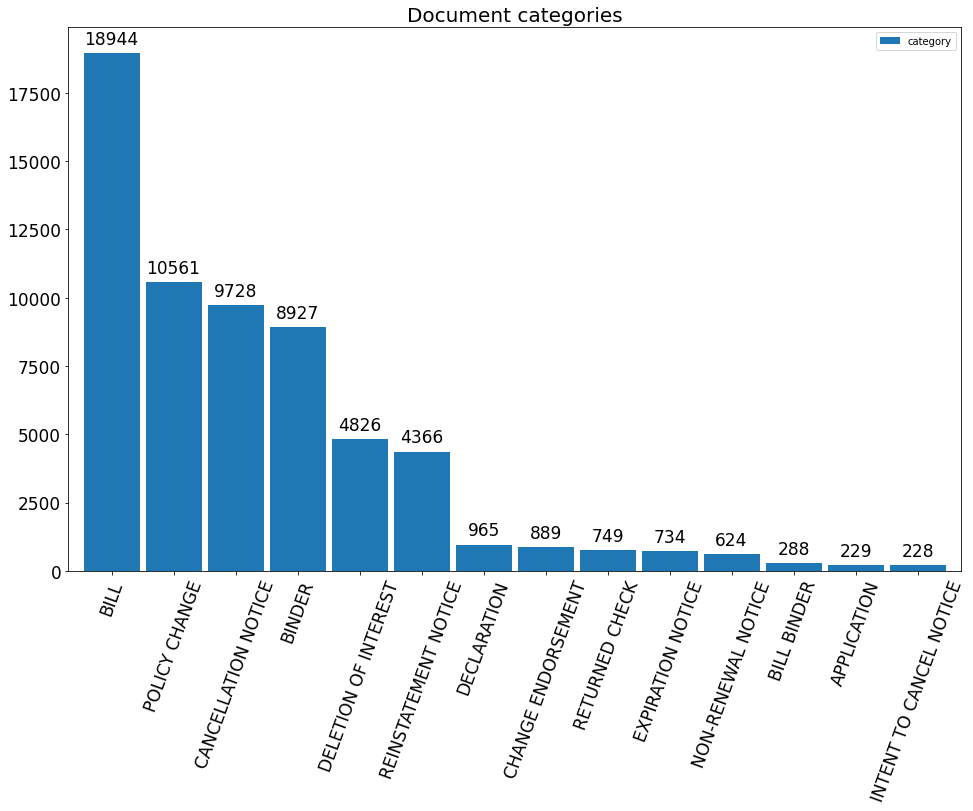

In [24]:
ph.plotValueCounts(df, 'category',
                   titleText='Document categories',
                   annotateFontSz=17, tickFontSz=17, titleFontSz=20,
                   xrot=70.0, ctRot=0.0)  #, saveAs='svg')

In [25]:
randomState = np.random.RandomState(11)

In [26]:
dfTr, dfTe = train_test_split(df, test_size=0.5, shuffle=True,
                              random_state=randomState, stratify=df.category)
dfTr.head()
dfTe.head()

,category,docText,tokens,docLength
45713,CANCELLATION NOTICE,ba8f19d976a8 cfd22ba194a9 1fc9cc5ae964 e27acd1...,"[ba8f19d976a8, cfd22ba194a9, 1fc9cc5ae964, e27...",486
11485,DELETION OF INTEREST,6b343f522f78 d4e08985be1b 586242498a88 9ad186d...,"[6b343f522f78, d4e08985be1b, 586242498a88, 9ad...",101
17076,POLICY CHANGE,672b804ff988 8d6768212702 ae26e97b8730 5defc9f...,"[672b804ff988, 8d6768212702, ae26e97b8730, 5de...",306
25383,BINDER,a3360a4991fa d38820625542 5c898c91ed1a 6b343f5...,"[a3360a4991fa, d38820625542, 5c898c91ed1a, 6b3...",379
46680,BINDER,0c4ce226d9fe d713e49bf0d2 1f0982fa6e99 eb51798...,"[0c4ce226d9fe, d713e49bf0d2, 1f0982fa6e99, eb5...",72


,category,docText,tokens,docLength
47803,BINDER,e7f10ad56136 6dd1f1f29782 f75bc82dffdc 36e7aa7...,"[e7f10ad56136, 6dd1f1f29782, f75bc82dffdc, 36e...",234
5829,BILL,2c4a2d44b565 8159faa9d80d 448cca02dae6 a0c0201...,"[2c4a2d44b565, 8159faa9d80d, 448cca02dae6, a0c...",338
3157,BILL,cf4fa36520cb a100eb50abec 225d8c4167d5 8f7a92c...,"[cf4fa36520cb, a100eb50abec, 225d8c4167d5, 8f7...",621
11385,BILL,2c33750c1d59 6ca2dd348663 6fd647aa15b8 288ccf0...,"[2c33750c1d59, 6ca2dd348663, 6fd647aa15b8, 288...",388
16733,BILL,7eb4767ef541 e244ebf791b5 1c303d15eb65 b01595c...,"[7eb4767ef541, e244ebf791b5, 1c303d15eb65, b01...",310


#### Comment about stop words, stemming or lemmatization

1. stop words
  * Ordinarily, might use curated list of stop words to eliminate words that a minimally informative. Without a mapping between original vocabulary and the hashes provided here, that approach is not possible
  * Given the hashes, a simplest approach would be to pass `max_df` keyword to TfidfVectorizer to eliminate those tokens seen in most documents.
    * After removing documents with fewer than 6 tokens, only 1 token is seen in more than 98% of documents
    * I would expect tokens for words 'the' 'of', 'and' perhaps 'lender' to appear in virtually any loan/mortgage document, and this probably indicates the survival of too many 'noise documents' at that 6-token threshold.
    * Setting `max_df=0.80` would eliminate 9 tokens, but it remains a guess what is being removed ⟶ best not to risk informative terms.
  * Different researchers have considered statistical bases for identifying stop words for specialized corpuses or unknown languages, e.g., [[Gerlach et al., 2019]](https://amaral.northwestern.edu/media/publication_pdfs/s42256-019-0112-6.pdf). The authors of that paper in particular claim that their approach can *greatly* reduce vocabulary size while retaining model accuracy. A cost-benefit estimate would be in order before attempting the effort required.


1. stemming or lemmatization
  * Provided with hashes instead of words, we have no means for reducing vocabulary via stemming or lemmatization.
  
  Gerlach, M., Shi, H. & Amaral, L.A.N. A universal information theoretic approach to the identification of stopwords. Nat Mach Intell 1, 606–612 (2019). https://doi.org/10.1038/s42256-019-0112-6

### Bag of words features

* start with a bag of words using `sklearn.feature_extraction.text.TfidfVectorizer`
  * `min_df = 5`
  * `ngram_range=(1, 2)`
  * `stop_words=None`
  * `sublinear_tf=True`
  
  Takes ~1–1½m.

In [27]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        ngram_range=(1, 2), stop_words=None)
Xtr = tfidf.fit_transform(dfTr.docText)
Xtr.shape
Xtr.data.nbytes/1024/1024

Xte = tfidf.transform(dfTe.docText)
Xte.shape
Xte.data.nbytes/1024/1024

(31029, 283479)

81.32532501220703

(31029, 283479)

80.05561065673828

In [28]:
tfidfVectorizerName = 'tfidfVectorizer.pkl'
if not (modelPath / tfidfVectorizerName).is_file():
    print(f"Saving {tfidfVectorizerName} to disk.")
    dump(tfidf, modelPath / tfidfVectorizerName)

**As selected, have *287 k* features**

#### Extract training and test labels

In [29]:
yTr = dfTr.category
yTe = dfTe.category

## Models

#### `f1_scorer`: grid search optimize for $f_1$ *f*<sub>1</sub>

In [30]:
f1_scorer = make_scorer(f1_score, average='weighted')

### Complement Naive Bayes

#### Default settings(baseline)

* default hyperparameters, except `fit_prior=False`
* Fit model, or load if exists saved version

In [31]:
print(asctime(gmtime()))
CNBname = 'ComplementNaiveBayes0.pkl'

if (modelPath / CNBname).is_file():
    print(f"Loading {CNBname} model from disk.")
    CNB = load(modelPath / CNBname)
else:
    print("Training Naive Bayes model ...")
    CNB = ComplementNB(fit_prior=False)
    CNB.fit(Xtr, yTr)

yPred = CNB.predict(Xte)

Sun Jan 17 01:11:24 2021
Loading ComplementNaiveBayes0.pkl model from disk.


In [32]:
print(yTe[:20].values)
print(yPred[:20])

['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'NON-RENEWAL NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'CANCELLATION NOTICE'
 'CANCELLATION NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']


#### Save file if new model

In [33]:
if not (modelPath / CNBname).is_file():
    print(f"Saving {CNBname} to disk.")
    dump(CNB, modelPath / CNBname)

#### Model evaluation

In [34]:
confusionMat = confusion_matrix(yTe, yPred)
print(confusionMat)

[[  14    9    0   72    0    0    0    0    0    0    0   19    0    1]
 [   0 8643    2  394  180    1    0   16    0    0    0  229    5    2]
 [   0   57    8   64    1    0    0    1    0    0    0   13    0    0]
 [   0  141    0 4097   45    2    2    4    0    0    0  170    2    1]
 [   1  830    0   70 3650    0    0  173    1    0    7   95   37    0]
 [   0   18    0   26   16  340    0    2    0    0    0   42    0    0]
 [   1   85    0  268   27    7   10   13    0    1    0   67    4    0]
 [   0   18    0    8  356    2    0 2013    0    0    0   15    1    0]
 [   0  196    0    3   51    0    0    4  106    0    1    6    0    0]
 [   0   74    0    3   36    0    0    0    0    0    0    1    0    0]
 [   0   17    0    1  220    0    0    2    0    0   64    8    0    0]
 [   0  619    1  836  184  190    1   47    9    0    2 3383    8    0]
 [   0  186    0   15  363    0    0   16    9    0    0   47 1547    0]
 [   0   34    0   28    1    0    0    0    0    0

In [35]:
accuracy = np.trace(confusionMat)/np.sum(confusionMat)
recall = np.diag(confusionMat)/np.sum(confusionMat, axis=1)
precision = np.diag(confusionMat)/np.sum(confusionMat, axis=0)
print(f"accuracy: {accuracy:0.3f}, "
      f"<precision>: {np.mean(precision):0.3f}, "
      f"<recall>: {np.mean(recall):0.3f}")

accuracy: 0.779, <precision>: 0.755, <recall>: 0.501


##### Classification report

In [36]:
classificationReport = classification_report(yTe.values, yPred,
                                             target_names=[str(c)for c in categories])
print(classificationReport)

                         precision    recall  f1-score   support

   DELETION OF INTEREST       0.88      0.12      0.21       115
         RETURNED CHECK       0.79      0.91      0.85      9472
                   BILL       0.73      0.06      0.10       144
          POLICY CHANGE       0.70      0.92      0.79      4464
    CANCELLATION NOTICE       0.71      0.75      0.73      4864
            DECLARATION       0.63      0.77      0.69       444
     CHANGE ENDORSEMENT       0.77      0.02      0.04       483
     NON-RENEWAL NOTICE       0.88      0.83      0.86      2413
                 BINDER       0.85      0.29      0.43       367
   REINSTATEMENT NOTICE       0.00      0.00      0.00       114
      EXPIRATION NOTICE       0.86      0.21      0.33       312
INTENT TO CANCEL NOTICE       0.82      0.64      0.72      5280
            APPLICATION       0.96      0.71      0.82      2183
            BILL BINDER       0.99      0.79      0.88       374

               accuracy

##### Sort `classificationReport` by support

In [37]:
print(ph.sortClassificationReport(classificationReport))

                         precision    recall  f1-score   support

         RETURNED CHECK       0.79      0.91      0.85      9472
INTENT TO CANCEL NOTICE       0.82      0.64      0.72      5280
    CANCELLATION NOTICE       0.71      0.75      0.73      4864
          POLICY CHANGE       0.70      0.92      0.79      4464
     NON-RENEWAL NOTICE       0.88      0.83      0.86      2413
            APPLICATION       0.96      0.71      0.82      2183
     CHANGE ENDORSEMENT       0.77      0.02      0.04       483
            DECLARATION       0.63      0.77      0.69       444
            BILL BINDER       0.99      0.79      0.88       374
                 BINDER       0.85      0.29      0.43       367
      EXPIRATION NOTICE       0.86      0.21      0.33       312
                   BILL       0.73      0.06      0.10       144
   DELETION OF INTEREST       0.88      0.12      0.21       115
   REINSTATEMENT NOTICE       0.00      0.00      0.00       114

               accuracy

####  Grid search

In [38]:
CNBbest = 'ComplementNaiveBayesBest.pkl'
CNBname = 'SearchComplementNaiveBayes.pkl'

if (modelPath / CNBname).is_file():
    print(f"Loading {CNBname} model from disk.")
    searchCNBC = load(modelPath / CNBname)
else:
    print(asctime(localtime()))

    randomState=0
    randomState = np.random.RandomState(randomState)

    paramGrid = {'alpha': np.logspace(-2, 0, 15),
                 'norm': [False, True]}

    searchCNBC = GridSearchCV(cv=5,
                              scoring=f1_scorer,
                              verbose=1,
                              estimator=ComplementNB(fit_prior=False),
                                                     param_grid=paramGrid)

    searchCNBC.fit(Xtr, yTr)

    dump(searchCNBC, modelPath / CNBname)

modelCNBC = searchCNBC.best_estimator_

Loading SearchComplementNaiveBayes.pkl model from disk.


#### Top 10 results, winning model

In [39]:
CNBCcvResults = mt.prettifyGridSearchCVResults(searchCNBC)
CNBCcvResults[:10]
pd.DataFrame.from_dict({'key': modelCNBC.get_params().keys(),
                        'value': modelCNBC.get_params().values()})

,param_alpha,param_norm,params,mean_test_score,std_test_score
rank_test_score,,,,,
1,0.013895,False,"{'alpha': 0.013894954943731374, 'norm': False}",0.799798,0.00359481
2,0.01,False,"{'alpha': 0.01, 'norm': False}",0.799777,0.00335597
3,0.019307,False,"{'alpha': 0.019306977288832496, 'norm': False}",0.799615,0.00349583
4,0.026827,False,"{'alpha': 0.02682695795279726, 'norm': False}",0.799084,0.00351763
5,0.0372759,False,"{'alpha': 0.0372759372031494, 'norm': False}",0.798996,0.00337848
6,0.0517947,False,"{'alpha': 0.0517947467923121, 'norm': False}",0.798063,0.00355071
7,0.0719686,True,"{'alpha': 0.07196856730011521, 'norm': True}",0.79729,0.00353844
8,0.0719686,False,"{'alpha': 0.07196856730011521, 'norm': False}",0.797197,0.00379255
9,0.0517947,True,"{'alpha': 0.0517947467923121, 'norm': True}",0.797038,0.00307717


,key,value
0,alpha,0.013895
1,class_prior,None
2,fit_prior,False
3,norm,False


In [40]:
yPred = modelCNBC.predict(Xte)
print(yTe[:20].values)
print(yPred[:20])

['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'NON-RENEWAL NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
['BINDER' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE' 'BILL' 'BINDER'
 'BINDER' 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE'
 'CANCELLATION NOTICE' 'POLICY CHANGE' 'POLICY CHANGE'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL'
 'CANCELLATION NOTICE' 'BINDER' 'BILL' 'BILL']


#### Save best file if new model

In [41]:
if not (modelPath / CNBbest).is_file():
    print(f"Saving {CNBbest} to disk.")
    dump(modelRFC, modelPath / CNBbest)

#### Model evaluation

In [42]:
confusionMat = confusion_matrix(yTe, yPred)
print(confusionMat)

[[  25    4    0   67    0    0    0    0    0    0    0   18    0    1]
 [   0 8458    2  446  262    1    1   16    2    2    0  272    8    2]
 [   0   53   10   61    1    0    0    0    0    0    0   19    0    0]
 [   0  100    0 4125   33    2    5    3    0    0    0  187    4    5]
 [   1  572    0   77 3848    0    0  185    2    5   15  102   56    1]
 [   0   10    0   29   15  340    0    2    1    0    2   43    2    0]
 [   2   69    0  267   27    7   20   13    0    1    2   71    4    0]
 [   0    8    0   11  302    2    0 2068    0    4    0   16    2    0]
 [   0  131    0    3   44    0    0    5  173    1    1    8    1    0]
 [   0   43    0    1   36    0    0    0    0   32    0    2    0    0]
 [   0    6    0    0  172    0    0    2    0    1  117   12    2    0]
 [   0  413    3  777  154  190    2   45   11    1    3 3653   26    2]
 [   0   89    0   22  209    0    0   17   10    1    0   38 1797    0]
 [   0   14    0   24    0    0    0    0    0    0

In [43]:
accuracy = np.trace(confusionMat)/np.sum(confusionMat)
recall = np.diag(confusionMat)/np.sum(confusionMat, axis=1)
precision = np.diag(confusionMat)/np.sum(confusionMat, axis=0)
print(f"accuracy: {accuracy:0.3f}, "
      f"<precision>: {np.mean(precision):0.3f}, "
      f"<recall>: {np.mean(recall):0.3f}")

accuracy: 0.805, <precision>: 0.799, <recall>: 0.576


##### Classification report

In [44]:
classificationReport = classification_report(yTe.values, yPred,
                                             target_names=[str(c)for c in categories])
print(classificationReport)

                         precision    recall  f1-score   support

   DELETION OF INTEREST       0.89      0.22      0.35       115
         RETURNED CHECK       0.85      0.89      0.87      9472
                   BILL       0.67      0.07      0.13       144
          POLICY CHANGE       0.70      0.92      0.80      4464
    CANCELLATION NOTICE       0.75      0.79      0.77      4864
            DECLARATION       0.63      0.77      0.69       444
     CHANGE ENDORSEMENT       0.71      0.04      0.08       483
     NON-RENEWAL NOTICE       0.88      0.86      0.87      2413
                 BINDER       0.87      0.47      0.61       367
   REINSTATEMENT NOTICE       0.67      0.28      0.40       114
      EXPIRATION NOTICE       0.84      0.38      0.52       312
INTENT TO CANCEL NOTICE       0.82      0.69      0.75      5280
            APPLICATION       0.94      0.82      0.88      2183
            BILL BINDER       0.97      0.87      0.91       374

               accuracy

##### Sort `classificationReport` by support

In [45]:
print(ph.sortClassificationReport(classificationReport))

                         precision    recall  f1-score   support

         RETURNED CHECK       0.85      0.89      0.87      9472
INTENT TO CANCEL NOTICE       0.82      0.69      0.75      5280
    CANCELLATION NOTICE       0.75      0.79      0.77      4864
          POLICY CHANGE       0.70      0.92      0.80      4464
     NON-RENEWAL NOTICE       0.88      0.86      0.87      2413
            APPLICATION       0.94      0.82      0.88      2183
     CHANGE ENDORSEMENT       0.71      0.04      0.08       483
            DECLARATION       0.63      0.77      0.69       444
            BILL BINDER       0.97      0.87      0.91       374
                 BINDER       0.87      0.47      0.61       367
      EXPIRATION NOTICE       0.84      0.38      0.52       312
                   BILL       0.67      0.07      0.13       144
   DELETION OF INTEREST       0.89      0.22      0.35       115
   REINSTATEMENT NOTICE       0.67      0.28      0.40       114

               accuracy

##### Plot confusion matrix

* As this is a straight confusion matrix, diagonal elements mostly reflect class size in test set
* *This is hard to interpret by visual inspection alone*

In [46]:
labelFontSz = 16
tickFontSz = 13
titleFontSz = 20

fileNameAugmentString:
 ComplementNaiveBayesBest
Δt:  0.40s.


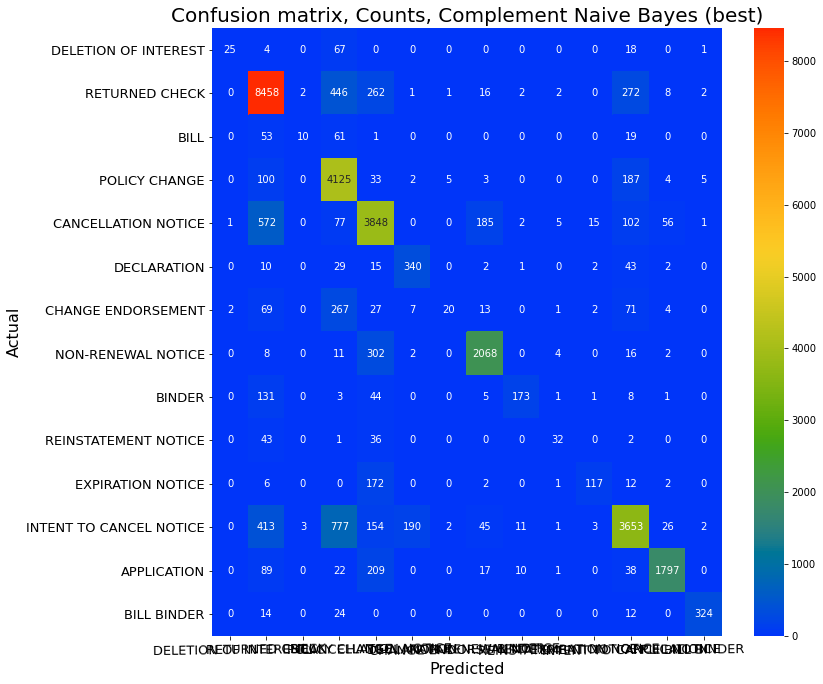

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'Complement Naive Bayes (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0,
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

##### Plot recall confusion matrix (normalized by row)

* diagonal elements now represent the *recall* for each class

fileNameAugmentString:
 ComplementNaiveBayesBest
Δt:  0.39s.


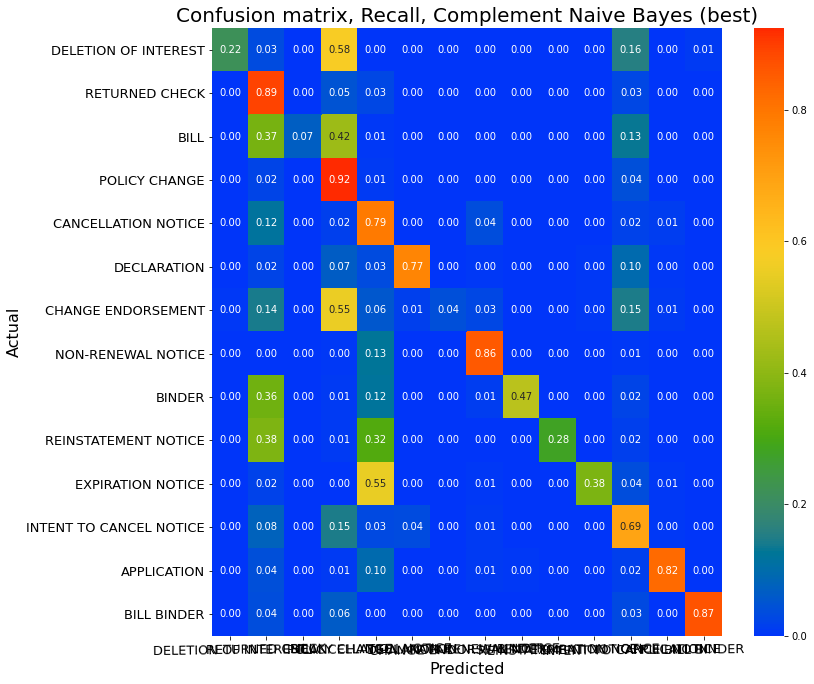

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'Complement Naive Bayes (best)',
                       ax = ax, xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0, type='recall',
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

##### Plot precision confusion matrix (normalized by column)

* diagonal elements now represent the *precision* for each class

fileNameAugmentString:
 ComplementNaiveBayesBest
Δt:  0.38s.


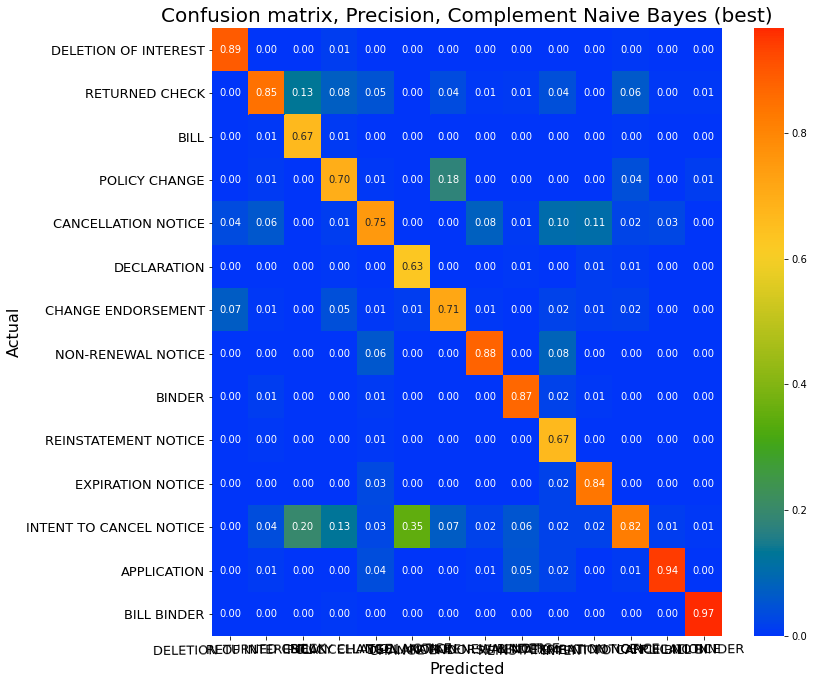

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'Complement Naive Bayes (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0, type='precision',
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

### Random Forest

#### Default settings

***except* `max_depth=300, n_estimators=200, class_weights='balanced'`**

In [50]:
print(asctime(gmtime()))
RFname = 'RandomForest0.pkl'

if (modelPath / RFname).is_file():
    print(f"Loading {RFname} model from disk.")
    RF = load(modelPath / RFname)
else:
    print("Training Random Forest model ...")
    randomState=0
    randomState = np.random.RandomState(randomState)

    RF = RandomForestClassifier(random_state=randomState, n_jobs=-1, n_estimators=200,
                                max_depth=300, class_weight='balanced')
    RF.fit(Xtr, yTr)

yPred = RF.predict(Xte)

Sun Jan 17 01:11:30 2021
Loading RandomForest0.pkl model from disk.


In [51]:
print(yTe[:20].values)
print(yPred[:20])

['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'NON-RENEWAL NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'CANCELLATION NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']


##### Save file if new model

In [52]:
if not (modelPath / RFname).is_file():
    print(f"Saving {RFname} to disk.")
    dump(RF, modelPath / RFname)

#### Model evaluation

In [53]:
confusionMat = confusion_matrix(yTe, yPred)
print(confusionMat)

[[  46    8    0   50    0    0    0    0    0    0    0   10    0    1]
 [   1 8510   22  209  294    2   21    1   25    5    0  373    7    2]
 [   0   56   20   40    1    0    0    0    0    0    0   27    0    0]
 [   1  115    1 3976   21    1   13    1    0    0    1  331    2    1]
 [   0  447    0   38 4053    0    6   95    2   12    9  138   64    0]
 [   0    5    0   14   19  336    0    1    1    0    0   67    1    0]
 [   3   66    1  254   22    1   38   14    0    1    2   75    6    0]
 [   0    6    0    5  310    2    8 2050    0    1    0   30    1    0]
 [   0   81    0    2   30    0    2    1  237    0    2   11    1    0]
 [   0   25    0    1   35    0    0    0    0   50    0    2    1    0]
 [   0    2    0    0  100    0    1    2    0    0  189   17    1    0]
 [   3  248    5  311   77   34   12   16    9    1    3 4528   33    0]
 [   0   37    0   11   96    0    1    4    3    0    0   64 1967    0]
 [   0   17    0    9    1    0    4    0    0    0

In [54]:
accuracy = np.trace(confusionMat)/np.sum(confusionMat)
recall = np.diag(confusionMat)/np.sum(confusionMat, axis=1)
precision = np.diag(confusionMat)/np.sum(confusionMat, axis=0)
print(f"accuracy: {accuracy:0.3f}, "
      f"<precision>: {np.mean(precision):0.3f}, "
      f"<recall>: {np.mean(recall):0.3f}")

accuracy: 0.848, <precision>: 0.797, <recall>: 0.652


##### Classification report

In [55]:
classificationReport = classification_report(yTe.values, yPred,
                                             target_names=[str(c)for c in categories])
print(classificationReport)

                         precision    recall  f1-score   support

   DELETION OF INTEREST       0.85      0.40      0.54       115
         RETURNED CHECK       0.88      0.90      0.89      9472
                   BILL       0.41      0.14      0.21       144
          POLICY CHANGE       0.81      0.89      0.85      4464
    CANCELLATION NOTICE       0.80      0.83      0.82      4864
            DECLARATION       0.89      0.76      0.82       444
     CHANGE ENDORSEMENT       0.36      0.08      0.13       483
     NON-RENEWAL NOTICE       0.94      0.85      0.89      2413
                 BINDER       0.86      0.65      0.74       367
   REINSTATEMENT NOTICE       0.71      0.44      0.54       114
      EXPIRATION NOTICE       0.92      0.61      0.73       312
INTENT TO CANCEL NOTICE       0.79      0.86      0.82      5280
            APPLICATION       0.94      0.90      0.92      2183
            BILL BINDER       0.99      0.84      0.91       374

               accuracy

##### Sort `classificationReport` by support

In [56]:
print(ph.sortClassificationReport(classificationReport))

                         precision    recall  f1-score   support

         RETURNED CHECK       0.88      0.90      0.89      9472
INTENT TO CANCEL NOTICE       0.79      0.86      0.82      5280
    CANCELLATION NOTICE       0.80      0.83      0.82      4864
          POLICY CHANGE       0.81      0.89      0.85      4464
     NON-RENEWAL NOTICE       0.94      0.85      0.89      2413
            APPLICATION       0.94      0.90      0.92      2183
     CHANGE ENDORSEMENT       0.36      0.08      0.13       483
            DECLARATION       0.89      0.76      0.82       444
            BILL BINDER       0.99      0.84      0.91       374
                 BINDER       0.86      0.65      0.74       367
      EXPIRATION NOTICE       0.92      0.61      0.73       312
                   BILL       0.41      0.14      0.21       144
   DELETION OF INTEREST       0.85      0.40      0.54       115
   REINSTATEMENT NOTICE       0.71      0.44      0.54       114

               accuracy

####  Grid search

In [57]:
RFbest = 'RandomForestBest.pkl'
RFname = 'SearchRandomForest.pkl'

if (modelPath / RFname).is_file():
    print(f"Loading {RFname} model from disk.")
    searchRFC = load(modelPath / RFname)
else:
    print(asctime(localtime()))

    randomState=0
    randomState = np.random.RandomState(randomState)

    paramGrid = {'max_features': ['auto', 0.20],
                 'bootstrap': [False, True],
                 'class_weight': ['balanced', 'balanced_subsample'],
                 'max_depth': [250, 300, 350]}

    searchRFC = GridSearchCV(cv=5,
                             scoring=f1_scorer,
                             verbose=1,
                             estimator=RandomForestClassifier(random_state=randomState,
                                                              n_jobs=-1,
                                                              n_estimators=250),
                             param_grid=paramGrid)

    searchRFC.fit(Xtr, yTr)

    dump(searchRFC, modelPath / RFname)

modelRFC = searchRFC.best_estimator_

Loading SearchRandomForest.pkl model from disk.


##### Top 10 results, winning model

In [58]:
RFCcvResults = mt.prettifyGridSearchCVResults(searchRFC)
RFCcvResults[:10]
pd.DataFrame.from_dict({'key': modelRFC.get_params().keys(),
                        'value': modelRFC.get_params().values()})

,param_bootstrap,param_class_weight,param_max_depth,param_max_features,params,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,False,balanced_subsample,350,0.2,"{'bootstrap': False, 'class_weight': 'balanced...",0.870721,0.00340588
1,False,balanced,250,0.2,"{'bootstrap': False, 'class_weight': 'balanced...",0.870721,0.00340588
1,False,balanced,300,0.2,"{'bootstrap': False, 'class_weight': 'balanced...",0.870721,0.00340588
1,False,balanced,350,0.2,"{'bootstrap': False, 'class_weight': 'balanced...",0.870721,0.00340588
1,False,balanced_subsample,250,0.2,"{'bootstrap': False, 'class_weight': 'balanced...",0.870721,0.00340588
1,False,balanced_subsample,300,0.2,"{'bootstrap': False, 'class_weight': 'balanced...",0.870721,0.00340588
7,True,balanced,350,0.2,"{'bootstrap': True, 'class_weight': 'balanced'...",0.869912,0.00418259
7,True,balanced,300,0.2,"{'bootstrap': True, 'class_weight': 'balanced'...",0.869912,0.00418259
7,True,balanced,250,0.2,"{'bootstrap': True, 'class_weight': 'balanced'...",0.869912,0.00418259


,key,value
0,bootstrap,False
1,ccp_alpha,0
2,class_weight,balanced
3,criterion,gini
4,max_depth,250
5,max_features,0.2
6,max_leaf_nodes,None
7,max_samples,None
8,min_impurity_decrease,0
9,min_impurity_split,None


In [59]:
yPred = modelRFC.predict(Xte)
print(yTe[:20].values)
print(yPred[:20])

['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'NON-RENEWAL NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
['BINDER' 'BILL' 'BILL' 'CANCELLATION NOTICE' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'CANCELLATION NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']


##### Save best file if new model

<font color='darkred'>*Skip this, since want 2nd best model; same scores, lighter footprint.*</font>

In [60]:
# if not (modelPath / RFbest).is_file():
#     print(f"Saving {RFbest} to disk.")
#     dump(modelRFC, modelPath / RFbest)

#### Re-run 2nd best grid search

In [61]:
print(asctime(gmtime()))
RFname = 'RandomForest1.pkl'

if (modelPath / RFname).is_file():
    print(f"Loading {RFname} model from disk.")
    RF = load(modelPath / RFname)
else:
    print("Training Random Forest model ...")
    randomState=11
    randomState = np.random.RandomState(randomState)

    RF = RandomForestClassifier(random_state=randomState,
                                bootstrap=False,
                                max_features=0.2,
                                n_jobs=-1,
                                class_weight='balanced',
                                max_depth=250,
                                n_estimators=250)
    RF.fit(Xtr, yTr)

yPred = RF.predict(Xte)

Sun Jan 17 01:11:41 2021
Loading RandomForest1.pkl model from disk.


In [62]:
print(yTe[:20].values)
print(yPred[:20])
print(RF.predict_proba(Xte[:20]))

['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'NON-RENEWAL NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
['BINDER' 'BILL' 'BILL' 'CANCELLATION NOTICE' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'CANCELLATION NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
[[0.   0.02 0.   0.88 0.   0.01 0.   0.   0.   0.   0.   0.09 0.   0.  ]
 [0.   0.91 0.   0.01 0.01 0.   0.   0.   0.   0.   0.   0.06 0.   0.  ]
 [0.   0.96 0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.37 0.   0.   0.58 0.   0.01 0.   0.   0.   0.   0.02 0.01 0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.92 0.   0.   0.01 0.   0.   0.   0.   0.06 0.   0.  ]
 [

##### Save file if new model

In [63]:
if not (modelPath / RFname).is_file():
    print(f"Saving {RFname} to disk.")
    dump(RF, modelPath / RFname)

#### Model evaluation

In [64]:
confusionMat = confusion_matrix(yTe, yPred)
print(confusionMat)

[[  66    3    0   37    0    0    0    0    0    0    0    8    0    1]
 [   4 8526   36  119  365    4   49    2   41    6    0  304   12    4]
 [   0   77   26   12    1    0    0    0    0    0    0   28    0    0]
 [   5  111    5 3998   17    2   39    1    0    0    1  275    5    5]
 [   0  338    0   18 4170    0   13  120    3   13   16   92   81    0]
 [   0    5    0    9    1  349    2    3    2    0    0   72    1    0]
 [   4   61    1  157   25    1  129   14    1    1    3   79    7    0]
 [   0    2    0    5  169    2    8 2188    0    0    0   38    1    0]
 [   0   55    0    1    6    0    2    2  284    0    4   11    2    0]
 [   0   14    0    0   11    0    0    0    0   86    0    3    0    0]
 [   0    1    0    1   19    0    1    0    0    2  276   10    2    0]
 [  11  198   11  278   55   40   22   24   12    2    6 4579   38    4]
 [   0   23    0    4   39    0    7    2    3    3    5   35 2062    0]
 [   1    9    0    6    1    0    4    0    1    0

In [65]:
accuracy = np.trace(confusionMat)/np.sum(confusionMat)
recall = np.diag(confusionMat)/np.sum(confusionMat, axis=1)
precision = np.diag(confusionMat)/np.sum(confusionMat, axis=0)
print(f"accuracy: {accuracy:0.3f}, "
      f"<precision>: {np.mean(precision):0.3f}, "
      f"<recall>: {np.mean(recall):0.3f}")

accuracy: 0.872, <precision>: 0.795, <recall>: 0.748


##### Classification report

In [66]:
classificationReport = classification_report(yTe.values, yPred,
                                             target_names=[str(c)for c in categories])
print(classificationReport)

                         precision    recall  f1-score   support

   DELETION OF INTEREST       0.73      0.57      0.64       115
         RETURNED CHECK       0.90      0.90      0.90      9472
                   BILL       0.33      0.18      0.23       144
          POLICY CHANGE       0.86      0.90      0.88      4464
    CANCELLATION NOTICE       0.85      0.86      0.86      4864
            DECLARATION       0.88      0.79      0.83       444
     CHANGE ENDORSEMENT       0.47      0.27      0.34       483
     NON-RENEWAL NOTICE       0.93      0.91      0.92      2413
                 BINDER       0.82      0.77      0.80       367
   REINSTATEMENT NOTICE       0.76      0.75      0.76       114
      EXPIRATION NOTICE       0.89      0.88      0.89       312
INTENT TO CANCEL NOTICE       0.82      0.87      0.85      5280
            APPLICATION       0.93      0.94      0.94      2183
            BILL BINDER       0.96      0.88      0.92       374

               accuracy

##### Sort `classificationReport` by support

In [67]:
print(ph.sortClassificationReport(classificationReport))

                         precision    recall  f1-score   support

         RETURNED CHECK       0.90      0.90      0.90      9472
INTENT TO CANCEL NOTICE       0.82      0.87      0.85      5280
    CANCELLATION NOTICE       0.85      0.86      0.86      4864
          POLICY CHANGE       0.86      0.90      0.88      4464
     NON-RENEWAL NOTICE       0.93      0.91      0.92      2413
            APPLICATION       0.93      0.94      0.94      2183
     CHANGE ENDORSEMENT       0.47      0.27      0.34       483
            DECLARATION       0.88      0.79      0.83       444
            BILL BINDER       0.96      0.88      0.92       374
                 BINDER       0.82      0.77      0.80       367
      EXPIRATION NOTICE       0.89      0.88      0.89       312
                   BILL       0.33      0.18      0.23       144
   DELETION OF INTEREST       0.73      0.57      0.64       115
   REINSTATEMENT NOTICE       0.76      0.75      0.76       114

               accuracy

##### Plot confusion matrix

* As this is a straight confusion matrix, diagonal elements mostly reflect class size in test set
* *This is hard to interpret by visual inspection alone*

fileNameAugmentString:
 RandomForestBest
Δt:  0.38s.


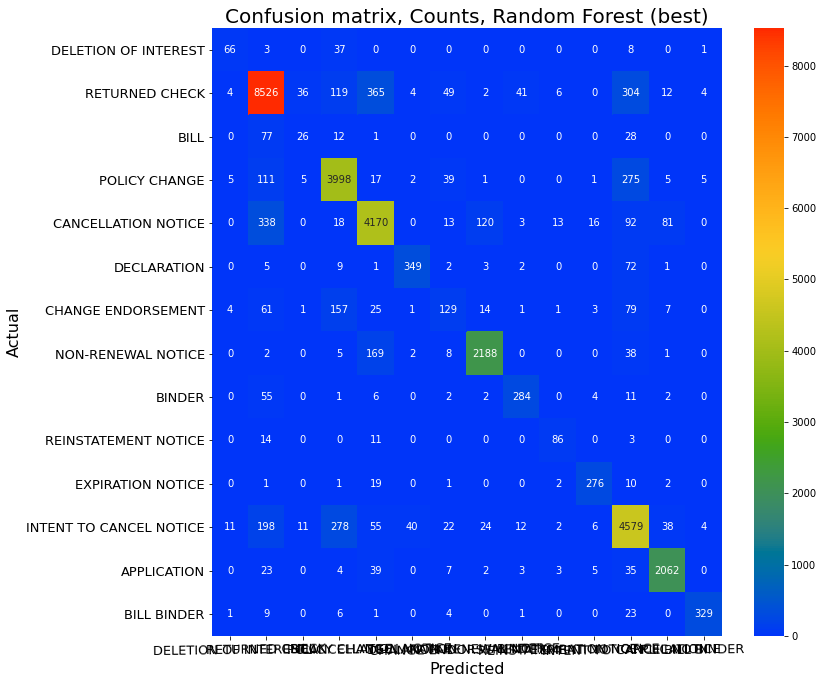

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'Random Forest (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0,
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

##### Plot recall confusion matrix (normalized by row)

* diagonal elements now represent the *recall* for each class

fileNameAugmentString:
 RandomForestBest
Δt:  0.39s.


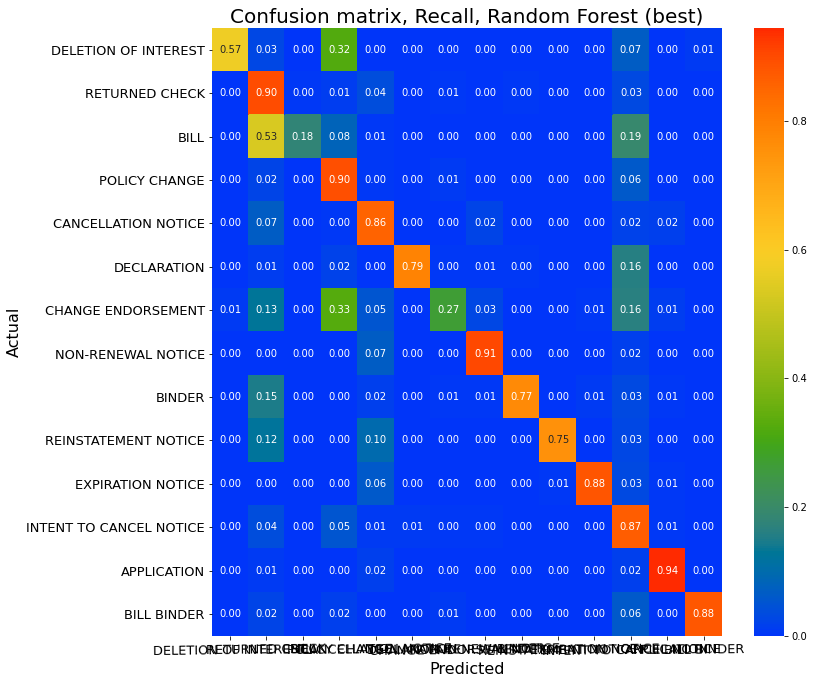

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'Random Forest (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0, type='recall',
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

##### Plot precision confusion matrix (normalized by column)

* diagonal elements now represent the *precision* for each class

fileNameAugmentString:
 RandomForestBest
Δt:  0.39s.


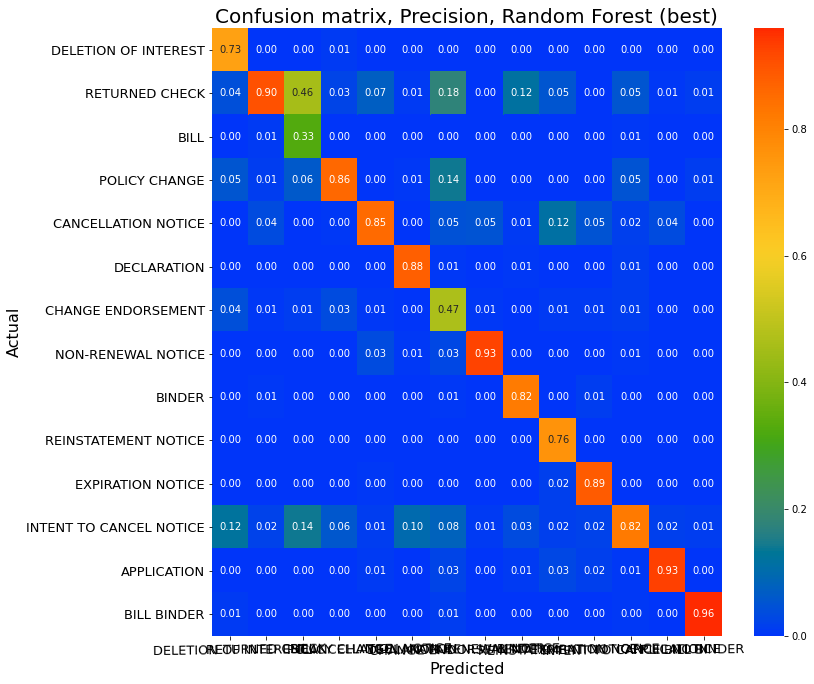

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'Random Forest (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0, type='precision',
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

##### Feature importance

In [71]:
fis = RF.feature_importances_
fis.shape
np.shape(Xte)
vocab = tfidf.vocabulary_
revVocab = {v: k for k, v in vocab.items()}
tokens = [revVocab[i] for i in range(np.shape(Xte)[1])]
tokens[:10]
featureImports = pd.DataFrame(zip(range(len(fis)), tokens, fis),
                              columns=['tokenIndex', 'token', 'featureWeight'])
featureImports.sort_values(by='featureWeight', inplace=True, ascending=False)
featureImports = featureImports.reset_index(drop=True)
featureImports.head(15)

(283479,)

(31029, 283479)

['00033092bc77',
 '00089aedfec5',
 '000b27c7c4eb',
 '000cde20541f',
 '000ec8768139',
 '000ec8768139 133d46f7ed38',
 '000ec8768139 1b3e5dc39eb9',
 '000ec8768139 2ca392db71fd',
 '000ec8768139 37b538ac615a',
 '000ec8768139 54709b24b45f']

,tokenIndex,token,featureWeight
0,110485,66b4e66655f9,0.028593
1,270816,f77ad3479ff2,0.026235
2,46197,296e1c47e3cc,0.025071
3,100012,5d7641b096f0,0.024322
4,44821,28b12e45914e,0.023703
5,165743,98d0d51b397c,0.022832
6,207671,befbf6d74a98,0.019368
7,129523,73e4aef1d1ff,0.016224
8,108066,641356219cbc,0.015459
9,223740,cdee33987473 b814d9d78802,0.013702


### Gradient boosted classifier

#### Default settings

In [72]:
print(asctime(gmtime()))
GBname = 'GradientBoost0.pkl'

if (modelPath / GBname).is_file():
    print(f"Loading {GBname} model from disk.")
    GB = load(modelPath / GBname)
else:
    print("Training Gradient Boosted model ...")
    randomState=0
    randomState = np.random.RandomState(randomState)

    GB = GradientBoostingClassifier(random_state=myRandomState,
                                    learning_rate=0.02,
                                    n_estimators=50,
                                    max_depth=3, verbose=1)
    GB.fit(Xtr, yTr)

yPred = GB.predict(Xte)

Sun Jan 17 01:11:51 2021
Loading GradientBoost0.pkl model from disk.


In [73]:
print(yTe[:20].values)
print(yPred[:20])

['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'NON-RENEWAL NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'POLICY CHANGE'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'BILL' 'REINSTATEMENT NOTICE'
 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE' 'BINDER' 'BILL' 'BILL']


##### Save file if new model

In [74]:
if not (modelPath / GBname).is_file():
    print(f"Saving {GBname} to disk.")
    dump(GB, modelPath / GBname)

#### Model evaluation

In [75]:
confusionMat = confusion_matrix(yTe, yPred)
print(confusionMat)

[[  28   26    1   33    0    0    1    0    0    0    0   25    0    1]
 [   3 8736   23   58  271    3    3    2    8    2    0  344   16    3]
 [   0   88   20    4    1    0    0    0    0    0    0   31    0    0]
 [   1  368    4 3486   13    2    6    2    1    0    1  572    5    3]
 [   0  795    0   24 3754    1    2   67    1    5   13  127   75    0]
 [   0   36    0   14    1  340    0    5    1    0    0   47    0    0]
 [   1  162    1  116   19    2   38   13    0    1    3  123    4    0]
 [   0  126    0    9  287    2    0 1945    0    0    1   41    2    0]
 [   0  133    0    2    3    0    0    3  208    0    6   12    0    0]
 [   0   21    0    1   20    0    0    0    0   72    0    0    0    0]
 [   0   40    0    2   12    0    0    2    0    0  247    8    1    0]
 [   4  799    2  223   55   26    3   20   11    5    6 4101   21    4]
 [   0  215    0    5  118    0    1    0    2    6   11   48 1777    0]
 [   0   42    0    1    0    0    1    0    0    0

In [76]:
accuracy = np.trace(confusionMat)/np.sum(confusionMat)
recall = np.diag(confusionMat)/np.sum(confusionMat, axis=1)
precision = np.diag(confusionMat)/np.sum(confusionMat, axis=0)
print(f"accuracy: {accuracy:0.3f}, "
      f"<precision>: {np.mean(precision):0.3f}, "
      f"<recall>: {np.mean(recall):0.3f}")

accuracy: 0.807, <precision>: 0.810, <recall>: 0.635


##### Classification report

In [77]:
classificationReport = classification_report(yTe.values, yPred,
                                             target_names=[str(c)for c in categories])
print(classificationReport)

                         precision    recall  f1-score   support

   DELETION OF INTEREST       0.76      0.24      0.37       115
         RETURNED CHECK       0.75      0.92      0.83      9472
                   BILL       0.39      0.14      0.21       144
          POLICY CHANGE       0.88      0.78      0.83      4464
    CANCELLATION NOTICE       0.82      0.77      0.80      4864
            DECLARATION       0.90      0.77      0.83       444
     CHANGE ENDORSEMENT       0.69      0.08      0.14       483
     NON-RENEWAL NOTICE       0.94      0.81      0.87      2413
                 BINDER       0.90      0.57      0.69       367
   REINSTATEMENT NOTICE       0.79      0.63      0.70       114
      EXPIRATION NOTICE       0.86      0.79      0.82       312
INTENT TO CANCEL NOTICE       0.74      0.78      0.76      5280
            APPLICATION       0.93      0.81      0.87      2183
            BILL BINDER       0.96      0.81      0.88       374

               accuracy

### XGBoost classifier

#### Default settings

In [78]:
print(asctime(gmtime()))
XGBname = 'XGBoost0.pkl'

if (modelPath / XGBname).is_file():
    print(f"Loading {XGBname} model from disk.")
    XGB = load(modelPath / XGBname)
else:
    print("Training Gradient Boosted model ...")
    randomState=0
    randomState = np.random.RandomState(randomState)

    XGB = XGBClassifier(random_state=myRandomState,
                        learning_rate=0.02,
                        n_estimators=50,
                        n_jobs=-1,
                        max_depth=3, verbose=1)
    XGB.fit(Xtr, yTr)

yPred = XGB.predict(Xte)

Sun Jan 17 01:11:53 2021
Loading XGBoost0.pkl model from disk.


In [79]:
print(yTe[:20].values)
print(yPred[:20])

['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'BINDER'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'NON-RENEWAL NOTICE'
 'REINSTATEMENT NOTICE' 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE'
 'BINDER' 'BILL' 'BILL']
['BINDER' 'BILL' 'BILL' 'BILL' 'BILL' 'BINDER' 'POLICY CHANGE'
 'CANCELLATION NOTICE' 'REINSTATEMENT NOTICE' 'CANCELLATION NOTICE'
 'POLICY CHANGE' 'POLICY CHANGE' 'BILL' 'REINSTATEMENT NOTICE'
 'POLICY CHANGE' 'BILL' 'CANCELLATION NOTICE' 'BINDER' 'BILL' 'BILL']


##### Save file if new model

In [80]:
if not (modelPath / XGBname).is_file():
    print(f"Saving {XGBname} to disk.")
    dump(GB, modelPath / XGBname)

#### Model evaluation

In [81]:
confusionMat = confusion_matrix(yTe, yPred)
print(confusionMat)

[[  36   13    0   44    0    0    0    0    0    0    0   20    1    1]
 [   2 8578   19  121  310    2    7    3   14    2    1  394   16    3]
 [   0   66   22   11    2    0    0    0    0    0    0   43    0    0]
 [   2  183    1 3660   21    2   27    6    2    0    1  547    7    5]
 [   0  560    0   40 3794    1   10  133    3   10   17  175  121    0]
 [   0   10    0   20    3  344    0   13    3    0    1   50    0    0]
 [   2   89    2  159   22    2   73   14    1    1    3  107    7    1]
 [   0   17    0   18  306    2    0 2000    1    0    1   61    7    0]
 [   0  113    0    2    4    0    1    4  214    2    7   19    1    0]
 [   0   21    0    1   25    0    0    0    0   63    0    4    0    0]
 [   0   11    0    4   15    0    0    7    4    0  251   16    4    0]
 [   7  436    5  357   67   27    5   46   14    2    6 4259   40    9]
 [   0   58    0    4  154    0    4    7    2    5   14   74 1861    0]
 [   0   23    0    3    0    0    0    0    0    0

In [82]:
accuracy = np.trace(confusionMat)/np.sum(confusionMat)
recall = np.diag(confusionMat)/np.sum(confusionMat, axis=1)
precision = np.diag(confusionMat)/np.sum(confusionMat, axis=0)
print(f"accuracy: {accuracy:0.3f}, "
      f"<precision>: {np.mean(precision):0.3f}, "
      f"<recall>: {np.mean(recall):0.3f}")

accuracy: 0.821, <precision>: 0.786, <recall>: 0.655


##### Classification report

In [83]:
classificationReport = classification_report(yTe.values, yPred,
                                             target_names=[str(c)for c in categories])
print(classificationReport)

                         precision    recall  f1-score   support

   DELETION OF INTEREST       0.73      0.31      0.44       115
         RETURNED CHECK       0.84      0.91      0.87      9472
                   BILL       0.45      0.15      0.23       144
          POLICY CHANGE       0.82      0.82      0.82      4464
    CANCELLATION NOTICE       0.80      0.78      0.79      4864
            DECLARATION       0.91      0.77      0.83       444
     CHANGE ENDORSEMENT       0.57      0.15      0.24       483
     NON-RENEWAL NOTICE       0.90      0.83      0.86      2413
                 BINDER       0.83      0.58      0.68       367
   REINSTATEMENT NOTICE       0.74      0.55      0.63       114
      EXPIRATION NOTICE       0.83      0.80      0.82       312
INTENT TO CANCEL NOTICE       0.73      0.81      0.77      5280
            APPLICATION       0.90      0.85      0.88      2183
            BILL BINDER       0.94      0.84      0.89       374

               accuracy

##### Sort `classificationReport` by support

In [84]:
print(ph.sortClassificationReport(classificationReport))

                         precision    recall  f1-score   support

         RETURNED CHECK       0.84      0.91      0.87      9472
INTENT TO CANCEL NOTICE       0.73      0.81      0.77      5280
    CANCELLATION NOTICE       0.80      0.78      0.79      4864
          POLICY CHANGE       0.82      0.82      0.82      4464
     NON-RENEWAL NOTICE       0.90      0.83      0.86      2413
            APPLICATION       0.90      0.85      0.88      2183
     CHANGE ENDORSEMENT       0.57      0.15      0.24       483
            DECLARATION       0.91      0.77      0.83       444
            BILL BINDER       0.94      0.84      0.89       374
                 BINDER       0.83      0.58      0.68       367
      EXPIRATION NOTICE       0.83      0.80      0.82       312
                   BILL       0.45      0.15      0.23       144
   DELETION OF INTEREST       0.73      0.31      0.44       115
   REINSTATEMENT NOTICE       0.74      0.55      0.63       114

               accuracy

#### Grid search

* XGBoost wants integer values for class labels, so create numeric label pd.Series

Takes ~5h, 53m.

In [85]:
categoryDict = dict(zip(categories, range(len(categories))))
categoryDict
yNumericTr = yTr.apply(lambda x: categoryDict[x])
yNumericTe = yTe.apply(lambda x: categoryDict[x])

{'DELETION OF INTEREST': 0,
 'RETURNED CHECK': 1,
 'BILL': 2,
 'POLICY CHANGE': 3,
 'CANCELLATION NOTICE': 4,
 'DECLARATION': 5,
 'CHANGE ENDORSEMENT': 6,
 'NON-RENEWAL NOTICE': 7,
 'BINDER': 8,
 'REINSTATEMENT NOTICE': 9,
 'EXPIRATION NOTICE': 10,
 'INTENT TO CANCEL NOTICE': 11,
 'APPLICATION': 12,
 'BILL BINDER': 13}

In [86]:
XGBCname = 'SearchXGBoost.pkl'
XGBCbest = 'XGBoostBest.pkl'

if (modelPath / XGBCname).is_file():
    searchXGBC = load(modelPath / XGBCname)
else:
    print(asctime(localtime()))

    randomState=0
    myRandomState = np.random.RandomState(randomState)

    paramGrid = {'n_estimators': [150, 200],
                 'max_depth': [3, 5, 7],
                 'learning_rate': [0.015, 0.03]}

    searchXGBC = GridSearchCV(cv=5,
                             scoring=f1_scorer,
                             verbose=1,
                             estimator=XGBClassifier(random_state=myRandomState,
                                                     use_label_encoder=False,
                                                     n_jobs=-1,
                                                     gpu_id=1),
                             param_grid=paramGrid)
    searchXGBC.fit(Xtr, yNumericTr)

    dump(searchXGBC, modelPath / XGBCname)

modelXGBC = searchXGBC.best_estimator_

##### Top 10 results, winning model

In [87]:
modelXGBC = searchXGBC.best_estimator_

In [88]:
XGBCcvResults = mt.prettifyGridSearchCVResults(searchXGBC)
XGBCcvResults[:10]
pd.DataFrame.from_dict({'key': modelXGBC.get_params().keys(),
                        'value': modelXGBC.get_params().values()})

,param_learning_rate,param_max_depth,param_n_estimators,params,mean_test_score,std_test_score
rank_test_score,,,,,,
1,0.03,7,200,"{'learning_rate': 0.03, 'max_depth': 7, 'n_est...",0.871407,0.00309261
2,0.03,7,150,"{'learning_rate': 0.03, 'max_depth': 7, 'n_est...",0.869431,0.00390475
3,0.015,7,200,"{'learning_rate': 0.015, 'max_depth': 7, 'n_es...",0.866154,0.00389703
4,0.03,5,200,"{'learning_rate': 0.03, 'max_depth': 5, 'n_est...",0.865905,0.00421044
5,0.015,7,150,"{'learning_rate': 0.015, 'max_depth': 7, 'n_es...",0.862854,0.00395652
6,0.03,5,150,"{'learning_rate': 0.03, 'max_depth': 5, 'n_est...",0.862188,0.00425825
7,0.015,5,200,"{'learning_rate': 0.015, 'max_depth': 5, 'n_es...",0.857057,0.00287132
8,0.015,5,150,"{'learning_rate': 0.015, 'max_depth': 5, 'n_es...",0.854087,0.00310089
9,0.03,3,200,"{'learning_rate': 0.03, 'max_depth': 3, 'n_est...",0.853048,0.00343371


,key,value
0,objective,multi:softprob
1,use_label_encoder,False
2,base_score,0.5
3,booster,gbtree
4,colsample_bylevel,1
5,colsample_bynode,1
6,colsample_bytree,1
7,gamma,0
8,gpu_id,1
9,importance_type,gain


In [89]:
yPred = modelXGBC.predict(Xte)
print(yNumericTe[:20].values)
print(yPred[:20])

[8 2 2 2 2 8 8 4 9 4 3 3 7 9 3 2 4 8 2 2]
[8 2 2 4 2 8 8 4 9 4 3 3 7 9 3 2 4 8 2 2]


##### Save best file if new model

In [90]:
if not (modelPath / XGBCbest).is_file():
    print(f"Saving {XGBCbest} to disk.")
    dump(modelXGBC, modelPath / XGBCbest)

#### Model evaluation

In [91]:
confusionMat = confusion_matrix(yNumericTe, yPred)
print(confusionMat)

[[2205    0    6   35  158    0    2    1    5    1    0    0    0    0]
 [   0  324   17   27    0    1    0    0    5    0    0    0    0    0]
 [   1    3 8638  262  357   19    4    0  116   14   31    8    2   17]
 [  23    1  246 4542   68    6   39    6  282   42   12    1    9    3]
 [ 121    0  362   82 4172    6    0   12   21   73    3   12    0    0]
 [  14    0   76   86   24  119    2    3  145    9    0    1    3    1]
 [   3    0    5   62    2    1  361    0    7    1    2    0    0    0]
 [   0    0    1   17   23    0    0  269    1    0    1    0    0    0]
 [   1    3  101  286   16   25    2    1 4017    5    1    0    2    4]
 [   2    0   24   38   46    5    0    3    3 2058    2    2    0    0]
 [   3    0   66   15    5    3    0    3    1    3  268    0    0    0]
 [   0    0   16    4   17    0    0    0    0    0    0   77    0    0]
 [   0    1    5   13    0    0    0    0   36    0    0    0   60    0]
 [   0    0   87   28    0    0    0    0   10    0

In [92]:
accuracy = np.trace(confusionMat)/np.sum(confusionMat)
recall = np.diag(confusionMat)/np.sum(confusionMat, axis=1)
precision = np.diag(confusionMat)/np.sum(confusionMat, axis=0)
print(f"accuracy: {accuracy:0.3f}, "
      f"<precision>: {np.mean(precision):0.3f}, "
      f"<recall>: {np.mean(recall):0.3f}")

accuracy: 0.874, <precision>: 0.823, <recall>: 0.731


##### Classification report

In [93]:
classificationReport = classification_report(yNumericTe.values, yPred,
                                             target_names=[str(c)for c in categories])
print(classificationReport)

                         precision    recall  f1-score   support

   DELETION OF INTEREST       0.93      0.91      0.92      2413
         RETURNED CHECK       0.98      0.87      0.92       374
                   BILL       0.90      0.91      0.90      9472
          POLICY CHANGE       0.83      0.86      0.84      5280
    CANCELLATION NOTICE       0.85      0.86      0.86      4864
            DECLARATION       0.64      0.25      0.36       483
     CHANGE ENDORSEMENT       0.88      0.81      0.85       444
     NON-RENEWAL NOTICE       0.90      0.86      0.88       312
                 BINDER       0.86      0.90      0.88      4464
   REINSTATEMENT NOTICE       0.93      0.94      0.94      2183
      EXPIRATION NOTICE       0.84      0.73      0.78       367
INTENT TO CANCEL NOTICE       0.76      0.68      0.72       114
            APPLICATION       0.79      0.52      0.63       115
            BILL BINDER       0.43      0.13      0.20       144

               accuracy

##### Sort `classificationReport` by support

In [94]:
print(ph.sortClassificationReport(classificationReport))

                         precision    recall  f1-score   support

                   BILL       0.90      0.91      0.90      9472
          POLICY CHANGE       0.83      0.86      0.84      5280
    CANCELLATION NOTICE       0.85      0.86      0.86      4864
                 BINDER       0.86      0.90      0.88      4464
   DELETION OF INTEREST       0.93      0.91      0.92      2413
   REINSTATEMENT NOTICE       0.93      0.94      0.94      2183
            DECLARATION       0.64      0.25      0.36       483
     CHANGE ENDORSEMENT       0.88      0.81      0.85       444
         RETURNED CHECK       0.98      0.87      0.92       374
      EXPIRATION NOTICE       0.84      0.73      0.78       367
     NON-RENEWAL NOTICE       0.90      0.86      0.88       312
            BILL BINDER       0.43      0.13      0.20       144
            APPLICATION       0.79      0.52      0.63       115
INTENT TO CANCEL NOTICE       0.76      0.68      0.72       114

               accuracy

##### Plot confusion matrix

* As this is a straight confusion matrix, diagonal elements mostly reflect class size in test set
* *This is hard to interpret by visual inspection alone*

fileNameAugmentString:
 XgboostBest
Δt:  0.38s.


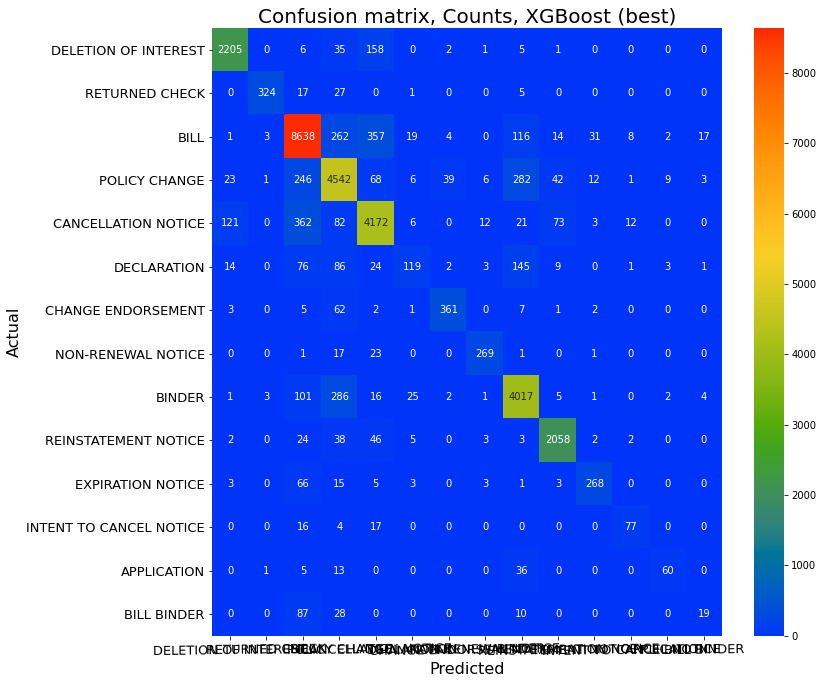

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'XGBoost (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0,
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

##### Plot recall confusion matrix (normalized by row)

* diagonal elements now represent the *recall* for each class

fileNameAugmentString:
 XgboostBest
Δt:  0.38s.


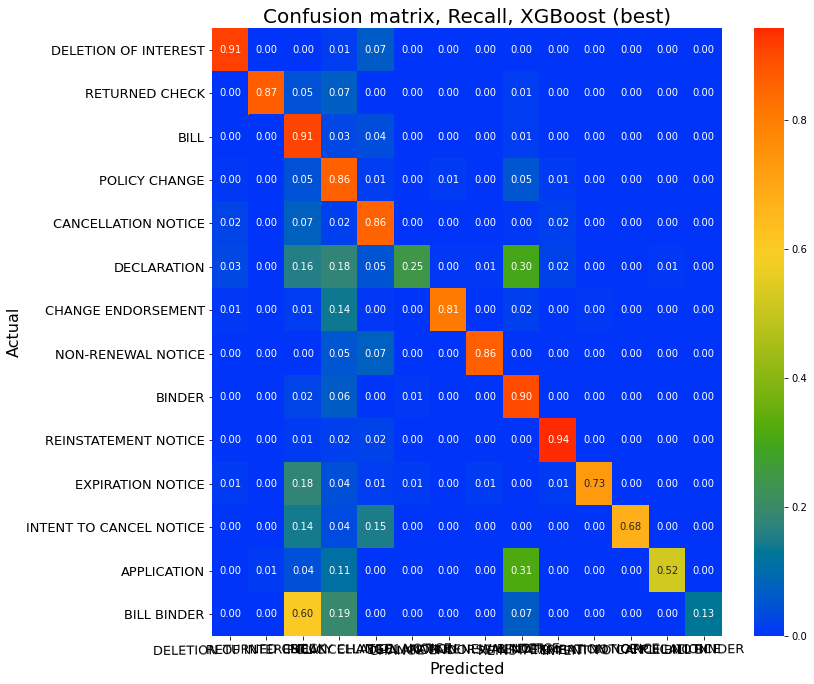

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'XGBoost (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0, type='recall',
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)

##### Plot precision confusion matrix (normalized by column)

* diagonal elements now represent the *precision* for each class

fileNameAugmentString:
 XgboostBest
Δt:  0.38s.


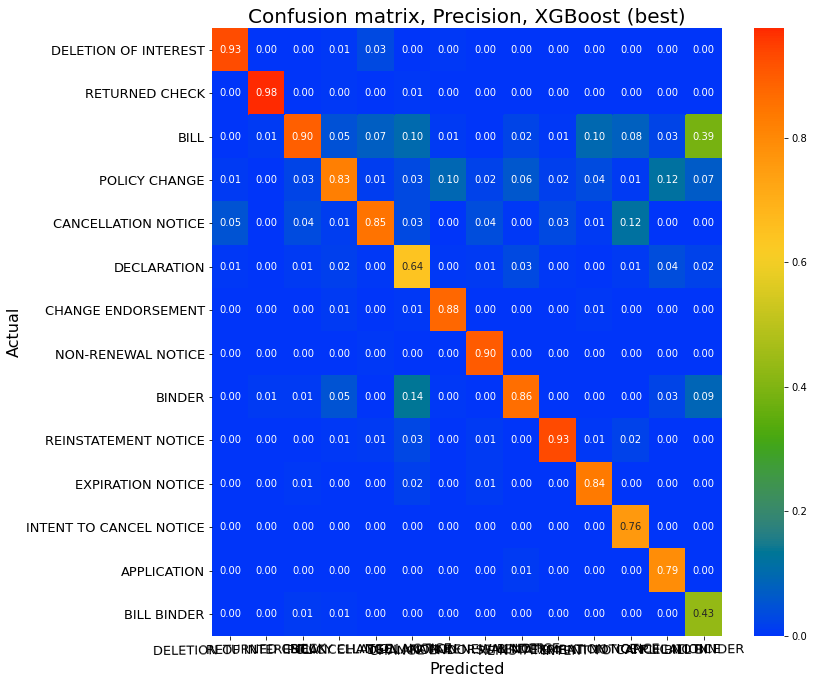

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ph.plotConfusionMatrix(confusionMat, saveAs=None, xlabels=categories,
                       ylabels=categories, titleText = 'XGBoost (best)',
                       ax = ax,  xlabelFontSz=labelFontSz,
                       xtickRotate=0.65, ytickRotate=0.0, type='precision',
                       ylabelFontSz=labelFontSz, xtickFontSz=tickFontSz,
                       ytickFontSz=tickFontSz, titleFontSz=titleFontSz)